## Particle Swarm Optimization Test

#### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pso

## PSO

#### Defining function which will be optimized

In [2]:
def function_to_optimize(x):
    # rosenbrock
    return (1-x[0])**2 + 100*(x[1] - x[0]**2)**2

#### Defining initial spawn area for population

In [3]:
spawn_area=np.array([[-5, 5], [-5, 5]])

#### PSO with Bare Bones

In [4]:
pso_bb=pso.ParticleSwarm(spawn_area=spawn_area, update_function="bare_bones")

best_pop_bb, best_eval_bb=pso_bb.optimize(function_to_optimize, n_iterations=600, n_dims=2)

Generation 0: best pop=[1.33892222 2.80990333], value=103.58254500670694
Generation 1: best pop=[1.63878267 1.75326685], value=87.33416482882939
Generation 2: best pop=[0.18343531 0.95909214], value=86.31136810957338
Generation 3: best pop=[ 0.29038046 -0.12415206], value=4.849653592770476
Generation 4: best pop=[ 0.29038046 -0.12415206], value=4.849653592770476
Generation 5: best pop=[0.24914115 0.10559499], value=0.7532200951821918
Generation 6: best pop=[0.24914115 0.10559499], value=0.7532200951821918
Generation 7: best pop=[0.22953644 0.04146619], value=0.6062047085531492
Generation 8: best pop=[0.32615118 0.13259626], value=0.5228298113571509
Generation 9: best pop=[0.64178911 0.43045354], value=0.162763415083361
Generation 10: best pop=[0.88755562 0.82253445], value=0.13360494119648536
Generation 11: best pop=[0.88755562 0.82253445], value=0.13360494119648536
Generation 12: best pop=[0.88755562 0.82253445], value=0.13360494119648536
Generation 13: best pop=[0.88755562 0.82253445

#### PSO with Canonical Variant

In [5]:
pso_canonical=pso.ParticleSwarm(spawn_area=spawn_area, update_function="canonical")

best_pop_canonical, best_eval_canonical=pso_canonical.optimize(function_to_optimize, n_iterations=600, n_dims=2)

Generation 0: best pop=[0.06964919 0.06904464], value=1.277634874362033
Generation 1: best pop=[0.06964919 0.06904464], value=1.277634874362033
Generation 2: best pop=[0.06964919 0.06904464], value=1.277634874362033
Generation 3: best pop=[0.06964919 0.06904464], value=1.277634874362033
Generation 4: best pop=[0.06964919 0.06904464], value=1.277634874362033
Generation 5: best pop=[1.6598942  2.68608212], value=0.9138624608362291
Generation 6: best pop=[1.6598942  2.68608212], value=0.9138624608362291
Generation 7: best pop=[1.6598942  2.68608212], value=0.9138624608362291
Generation 8: best pop=[1.68163928 2.89098164], value=0.8624270031988766
Generation 9: best pop=[1.36357067 1.81756709], value=0.3065557919509327
Generation 10: best pop=[1.36357067 1.81756709], value=0.3065557919509327
Generation 11: best pop=[1.36357067 1.81756709], value=0.3065557919509327
Generation 12: best pop=[1.36357067 1.81756709], value=0.3065557919509327
Generation 13: best pop=[1.46468642 2.15823706], valu

In [6]:
history_bb=pso_bb.get_history()
history_canonical=pso_canonical.get_history()

## Plotting results

#### Defining area to plot

In [7]:
x=np.arange(-5,5,0.1)
y=np.arange(-5,5,0.1)

#### Combinations

In [8]:
combinations = np.array(np.meshgrid(x, y)).T.reshape(-1,2)

#### Applying function

In [9]:
z=np.apply_along_axis(function_to_optimize, 1, combinations)

#### Reshaping z to be able to use contour plot

In [10]:
zz=z.reshape(-1, len(x)).T

#### Plotting results

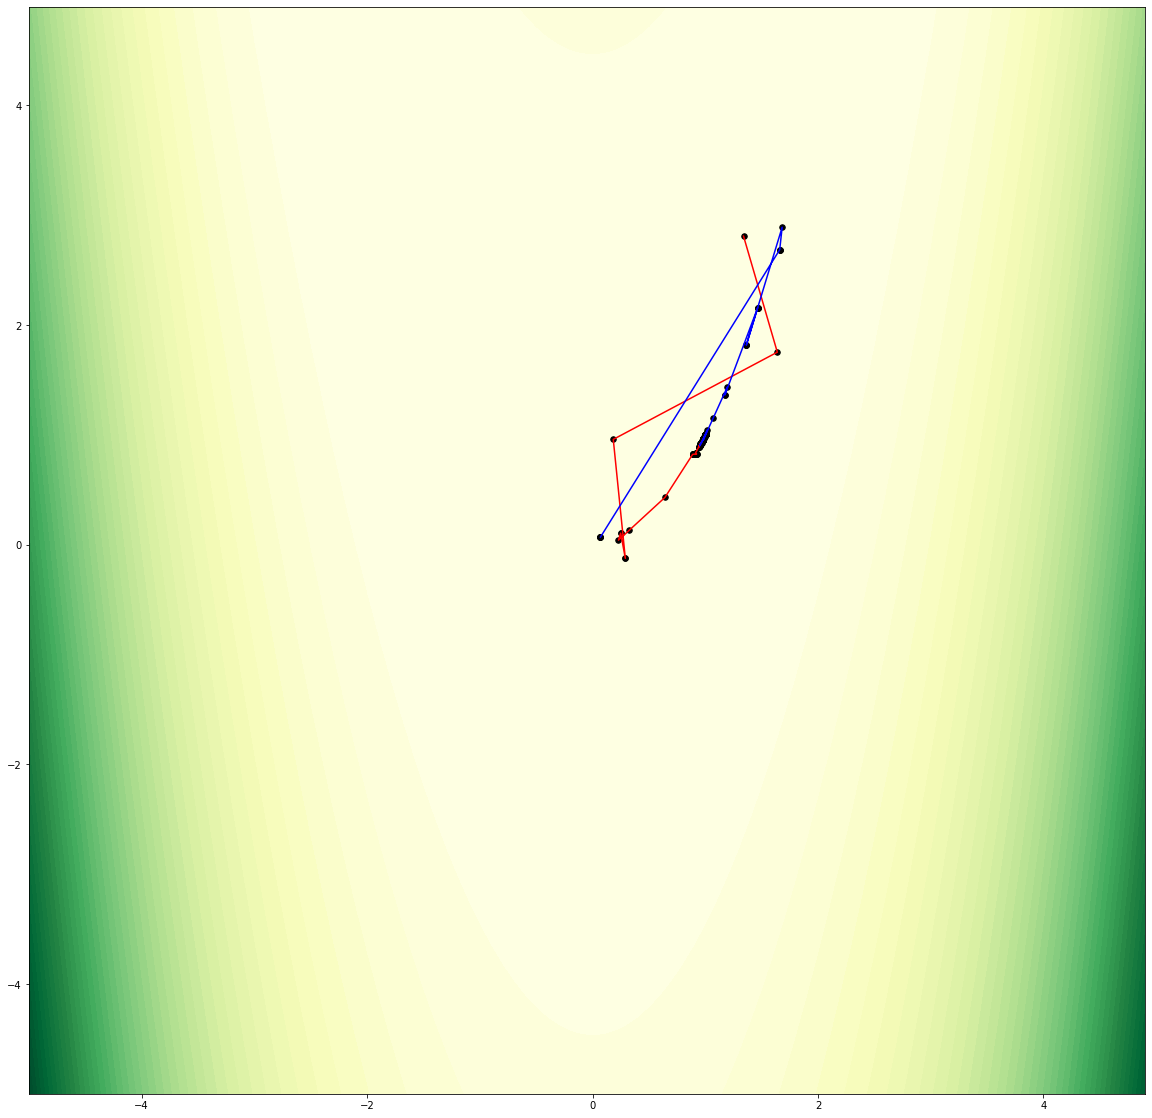

In [17]:
# plot area
plt.figure(figsize=(20, 20))
plt.contourf(x, y, zz, 50, cmap="YlGn")

# plot history for bare bones
plt.plot(history_bb[:,0], history_bb[:,1], c='red')
plt.scatter(history_bb[:,0], history_bb[:,1], c='black', s=30)

# plot history for canonical
plt.plot(history_canonical[:,0], history_canonical[:,1], c='blue')
plt.scatter(history_canonical[:,0], history_canonical[:,1], c='black', s=30)

## Results

In [18]:
print(f"Bare bones: Best value={best_eval_bb}, Coordinates={best_pop_bb}")
print(f"Canonical: Best value={best_eval_canonical}, Coordinates={best_pop_canonical}")

Bare bones: Best value=8.4088785885873e-11, Coordinates=[1.0000061  1.00001151]
Canonical: Best value=0.0, Coordinates=[1. 1.]


In this example Canonical Variant did way better than Bare Bones. Not only it found better spot but it took only 84 iterations to find it, compared to 435 for Bare Bones.